# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

<b>Dependencies and Setup</b>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

<b>Import API key</b>

In [2]:
from config import weather_api_key

<b>Incorporated citipy to determine city based on latitude and longitude</b>

In [3]:
from citipy import citipy

<b>Output File (CSV)</b>

In [4]:
output_data_file = "output_data/cities.csv"

<b>Range of latitudes and longitudes</b>

In [5]:
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

<b>List for holding lat_lngs and cities</b>

In [6]:
lat_lngs = []
cities = []

<b>Create a set of random lat and lng combinations</b>

In [7]:
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

<b>Identify nearest city for each lat, lng combination<br>
If the city is unique, then add it to our cities list</b>

In [8]:
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    if city not in cities:
        cities.append(city)

<b>Print the city count to confirm sufficient count</b>

In [9]:
len(cities)

569

In [10]:
# Getting list a cities for verification
cities

['ushuaia',
 'taolanaro',
 'qaanaaq',
 'san vicente',
 'yellowknife',
 'east london',
 'mar del plata',
 'kununurra',
 'new norfolk',
 'souillac',
 'rikitea',
 'lamu',
 'klaksvik',
 'storforshei',
 'illoqqortoormiut',
 'jiuquan',
 'busselton',
 'atuona',
 'mount isa',
 'lavrentiya',
 'tuktoyaktuk',
 'albany',
 'broome',
 'saldanha',
 'hobart',
 'dien bien',
 'saskylakh',
 'cape town',
 'pevek',
 'punta arenas',
 'warrington',
 'the pas',
 'bargal',
 'leningradskiy',
 'amderma',
 'dikson',
 'leh',
 'shingu',
 'kapaa',
 'hithadhoo',
 'los llanos de aridane',
 'bredasdorp',
 'lagoa',
 'constitucion',
 'palmer',
 'vaini',
 'kalmunai',
 'bardiyah',
 'victoria',
 'ketchikan',
 'goderich',
 'santa vitoria do palmar',
 'kruisfontein',
 'port elizabeth',
 'bluff',
 'hilo',
 'delijan',
 'japura',
 'avarua',
 'tuatapere',
 'tasiilaq',
 'san patricio',
 'vostok',
 'amapa',
 'arraial do cabo',
 'baruun-urt',
 'kodiak',
 'isiro',
 'puerto ayora',
 'sitka',
 'bethel',
 'hasaki',
 'saint-philippe',
 '

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

In [11]:
#url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

#query_url = f"{url}id={city}&appid={weather_api_key}&q="
#query_url

url = f'http://api.openweathermap.org/data/2.5/weather?APPID={weather_api_key}&units={units}&q='
#url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID"
#url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
url

'http://api.openweathermap.org/data/2.5/weather?APPID=335521b35734fcc972cb824b513189f4&units=imperial&q='

In [12]:
# Creating lists for to append API response data
cityname = []
country = []
latitude = []
longitude = []
cloudiness = []
date = []
wind = []
humidity = []
max_temp = []

In [13]:
# Creating print header
print('Beginning Data Retrieval')
print('------------------------------')

# Setting up loop counters
setnum = 1
countnum = 0

# Creating for loop to gather criteria from the random cities
for city in cities:
    countnum = countnum + 1
    if countnum == 51:
        countnum = 1
        setnum = setnum +1
        time.sleep(15)
        
    print(f'Processing Record {countnum} of Set {setnum} | {city}')
    try:
        response = requests.get(f"{url}{city}").json() 
        cityname.append(response['name'])
        country.append(response['sys']['country'])
        latitude.append(response['coord']['lat'])
        longitude.append(response['coord']['lon'])
        cloudiness.append(response['clouds']['all'])
        date.append(response['dt'])
        wind.append(response['wind']['speed'])
        humidity.append(response['main']['humidity'])
        max_temp.append(response['main']['temp_max'])
        #print((f"{url}{city}"))
    except:
        print('City not found.  Skipping...')
        print(f"{url}{city}")
        
print('------------------------------')
print('Data Retrieval Complete')
print('------------------------------')


Beginning Data Retrieval
------------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | taolanaro
City not found.  Skipping...
http://api.openweathermap.org/data/2.5/weather?APPID=335521b35734fcc972cb824b513189f4&units=imperial&q=taolanaro
Processing Record 3 of Set 1 | qaanaaq
Processing Record 4 of Set 1 | san vicente
Processing Record 5 of Set 1 | yellowknife
Processing Record 6 of Set 1 | east london
Processing Record 7 of Set 1 | mar del plata
Processing Record 8 of Set 1 | kununurra
Processing Record 9 of Set 1 | new norfolk
Processing Record 10 of Set 1 | souillac
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | lamu
Processing Record 13 of Set 1 | klaksvik
Processing Record 14 of Set 1 | storforshei
Processing Record 15 of Set 1 | illoqqortoormiut
City not found.  Skipping...
http://api.openweathermap.org/data/2.5/weather?APPID=335521b35734fcc972cb824b513189f4&units=imperial&q=illoqqortoormiut
Processing Record 16 of 

Processing Record 9 of Set 4 | detchino
Processing Record 10 of Set 4 | airai
Processing Record 11 of Set 4 | kaitangata
Processing Record 12 of Set 4 | surt
Processing Record 13 of Set 4 | salalah
Processing Record 14 of Set 4 | grand centre
City not found.  Skipping...
http://api.openweathermap.org/data/2.5/weather?APPID=335521b35734fcc972cb824b513189f4&units=imperial&q=grand centre
Processing Record 15 of Set 4 | port blair
Processing Record 16 of Set 4 | hervey bay
Processing Record 17 of Set 4 | labuhan
Processing Record 18 of Set 4 | coquimbo
Processing Record 19 of Set 4 | grand-santi
Processing Record 20 of Set 4 | castro
Processing Record 21 of Set 4 | puerto narino
Processing Record 22 of Set 4 | paredon
Processing Record 23 of Set 4 | segezha
Processing Record 24 of Set 4 | saleaula
City not found.  Skipping...
http://api.openweathermap.org/data/2.5/weather?APPID=335521b35734fcc972cb824b513189f4&units=imperial&q=saleaula
Processing Record 25 of Set 4 | paita
Processing Recor

Processing Record 7 of Set 7 | grindavik
Processing Record 8 of Set 7 | narsaq
Processing Record 9 of Set 7 | anisoc
Processing Record 10 of Set 7 | oussouye
Processing Record 11 of Set 7 | kodinar
Processing Record 12 of Set 7 | luena
Processing Record 13 of Set 7 | muisne
Processing Record 14 of Set 7 | ukiah
Processing Record 15 of Set 7 | clarence town
Processing Record 16 of Set 7 | sur
Processing Record 17 of Set 7 | raudeberg
Processing Record 18 of Set 7 | kiama
Processing Record 19 of Set 7 | merauke
Processing Record 20 of Set 7 | porto novo
Processing Record 21 of Set 7 | pacific grove
Processing Record 22 of Set 7 | teseney
Processing Record 23 of Set 7 | egvekinot
Processing Record 24 of Set 7 | tabou
Processing Record 25 of Set 7 | hovd
Processing Record 26 of Set 7 | senanga
Processing Record 27 of Set 7 | tual
Processing Record 28 of Set 7 | korgen
Processing Record 29 of Set 7 | bolungarvik
City not found.  Skipping...
http://api.openweathermap.org/data/2.5/weather?APP

Processing Record 3 of Set 10 | kulu
Processing Record 4 of Set 10 | sirsi
Processing Record 5 of Set 10 | charters towers
Processing Record 6 of Set 10 | calama
Processing Record 7 of Set 10 | bonavista
Processing Record 8 of Set 10 | lahaina
Processing Record 9 of Set 10 | xuddur
Processing Record 10 of Set 10 | gillette
Processing Record 11 of Set 10 | beyneu
Processing Record 12 of Set 10 | batsfjord
Processing Record 13 of Set 10 | nome
Processing Record 14 of Set 10 | tabuk
Processing Record 15 of Set 10 | meulaboh
Processing Record 16 of Set 10 | eydhafushi
Processing Record 17 of Set 10 | vaitape
Processing Record 18 of Set 10 | gouyave
Processing Record 19 of Set 10 | mormugao
Processing Record 20 of Set 10 | marawi
Processing Record 21 of Set 10 | pouembout
Processing Record 22 of Set 10 | zalaegerszeg
Processing Record 23 of Set 10 | nara
Processing Record 24 of Set 10 | laguna
Processing Record 25 of Set 10 | sinkat
City not found.  Skipping...
http://api.openweathermap.org

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [97]:
weather_test = {'City': cityname,'Country':country,'Latitude':latitude,
            'Longitude':longitude,'Cloudiness':cloudiness,'Date':date,
            'Wind':wind,'Humidity':humidity,'Max Temp':max_temp}
                        

In [195]:
# Creating DataFrame from dictionary data and exporting into a .csv file
weather_city = pd.DataFrame(weather_test)
weather_city.to_csv('WeatherOutput/city_weather_main.csv', index = False)

In [99]:
# Displaying DataFrame in Describe format.
weather_city.describe()

,Latitude,Longitude,Cloudiness,Date,Wind,Humidity,Max Temp
count,518.000000,518.000000,518.000000,5.180000e+02,518.000000,518.000000,518.000000
mean,20.467799,22.504479,53.934363,1.608322e+09,8.587992,74.791506,49.729633
std,33.883818,92.719696,39.795750,2.181376e+02,5.822403,18.373278,31.835416
min,-54.800000,-179.170000,0.000000,1.608321e+09,0.510000,1.000000,-47.200000
25%,-8.130000,-58.642500,12.000000,1.608322e+09,4.000000,65.250000,30.200000
50%,27.565000,26.535000,62.000000,1.608322e+09,7.190000,78.000000,59.000000
75%,48.175000,108.160000,95.000000,1.608322e+09,11.410000,88.000000,76.130000
max,78.220000,179.320000,100.000000,1.608322e+09,37.980000,100.000000,98.740000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [100]:
# Skipping - Max Humidity = 100% but not over.

<b>Get the indices of cities that have humidity over 100%.</b>

In [101]:
# Skipping - Max Humidity = 100% but not over.

<b>Make a new DataFrame equal to the city data to drop all humidity outliers by index.<br>
Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".</b>

In [115]:
# changing date & time into readable format
weather_city['Date'] = pd.to_datetime(weather_city['Date'], format='%Y-%m-%d')
weather_city

,City,Country,Latitude,Longitude,Cloudiness,Date,Wind,Humidity,Max Temp
0,Ushuaia,AR,-54.80,-68.30,75,2020-12-18 19:54:45,5.75,66,50.00
1,Qaanaaq,GL,77.48,-69.36,88,2020-12-18 19:55:58,2.51,87,0.88
2,San Vicente,AR,-26.62,-54.13,44,2020-12-18 20:02:13,2.13,40,89.02
3,Yellowknife,CA,62.46,-114.35,20,2020-12-18 19:55:30,3.36,64,-41.80
4,East London,ZA,-33.02,27.91,100,2020-12-18 19:58:11,12.66,90,70.07
...,...,...,...,...,...,...,...,...,...
513,Yabēlo,ET,4.88,38.08,0,2020-12-18 20:06:29,13.38,36,64.53
514,Along,IN,28.17,94.77,52,2020-12-18 20:06:31,1.72,75,47.52
515,Yerbogachën,RU,61.28,108.01,100,2020-12-18 19:57:27,8.37,94,6.30
516,Sola,VU,-13.88,167.55,14,2020-12-18 20:06:31,7.92,76,81.43


In [116]:
# Gathering quartiles information for calculations
quartiles = weather_city['Humidity'].quantile([.25,.5,.75])
quartiles

0.25    65.25
0.50    78.00
0.75    88.00
Name: Humidity, dtype: float64

In [117]:
# Additional calculations for IQR and standard deviation.
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
hum_std = weather_city['Humidity'].std()

print(f"The lower quartile of Humidity is: {lowerq}")
print(f"The upper quartile of Humidity is: {upperq}")
print(f"The interquartile range of Humidity is: {iqr}")
print(f"The the median of Humidity is: {quartiles[0.5]}")
print(f'The standard diviation of Humidity is: {hum_std}')

The lower quartile of Humidity is: 65.25
The upper quartile of Humidity is: 88.0
The interquartile range of Humidity is: 22.75
The the median of Humidity is: 78.0
The standard diviation of Humidity is: 18.373277765076516


In [118]:
#Calculating possible outliers
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

Values below 31.125 could be outliers.
Values above 122.125 could be outliers.


In [119]:
weather_hum = weather_city['Humidity']

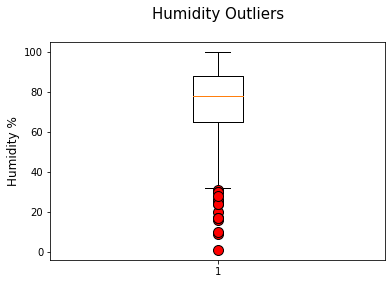

In [141]:
#Creating box & whisker plot to display outliers
fig1, ax1 = plt.subplots()
ax1.set_title('Humidity Outliers\n', fontsize = 15)
#labels = (['Humidity'])
ax1.set_ylabel('Humidity %', fontsize = 12)
flierprops = dict(markerfacecolor='r', markersize=10)
ax1.boxplot(weather_hum, flierprops=flierprops)

plt.show()

In [121]:
#Indentifying cities that are outliers
hum_outlier=weather_city.loc[weather_city['Humidity'] < 31.125,:]
hum_outlier

,City,Country,Latitude,Longitude,Cloudiness,Date,Wind,Humidity,Max Temp
73,Miraflores,MX,19.22,-98.81,20,2020-12-18 20:02:39,2.95,31,73.40
124,Valadares,PT,41.15,-7.98,99,2020-12-18 20:03:03,1.99,9,51.01
165,Mussomeli,IT,37.58,13.75,100,2020-12-18 20:03:26,3.60,1,55.99
195,Trelew,AR,-43.25,-65.31,68,2020-12-18 20:03:46,14.32,17,82.85
218,Bilma,NE,18.69,12.92,0,2020-12-18 20:03:50,7.11,26,66.47
309,Hirado,JP,33.36,129.55,100,2020-12-18 20:04:36,5.01,25,46.00
312,San Jorge,AR,-31.90,-61.86,65,2020-12-18 20:04:37,4.00,30,97.00
344,Nioro,GM,13.35,-15.75,0,2020-12-18 20:04:58,8.05,20,82.22
348,Bahía Blanca,AR,-38.72,-62.27,20,2020-12-18 20:04:59,17.22,24,95.00
351,Dolores,AR,-36.31,-57.68,100,2020-12-18 20:01:48,16.75,16,94.64


In [122]:
#Creating new dataframe without outliers
clean_city_df = weather_city[weather_city['Humidity'] > 31.25]
clean_city_df

,City,Country,Latitude,Longitude,Cloudiness,Date,Wind,Humidity,Max Temp
0,Ushuaia,AR,-54.80,-68.30,75,2020-12-18 19:54:45,5.75,66,50.00
1,Qaanaaq,GL,77.48,-69.36,88,2020-12-18 19:55:58,2.51,87,0.88
2,San Vicente,AR,-26.62,-54.13,44,2020-12-18 20:02:13,2.13,40,89.02
3,Yellowknife,CA,62.46,-114.35,20,2020-12-18 19:55:30,3.36,64,-41.80
4,East London,ZA,-33.02,27.91,100,2020-12-18 19:58:11,12.66,90,70.07
...,...,...,...,...,...,...,...,...,...
513,Yabēlo,ET,4.88,38.08,0,2020-12-18 20:06:29,13.38,36,64.53
514,Along,IN,28.17,94.77,52,2020-12-18 20:06:31,1.72,75,47.52
515,Yerbogachën,RU,61.28,108.01,100,2020-12-18 19:57:27,8.37,94,6.30
516,Sola,VU,-13.88,167.55,14,2020-12-18 20:06:31,7.92,76,81.43


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

<function matplotlib.pyplot.show>

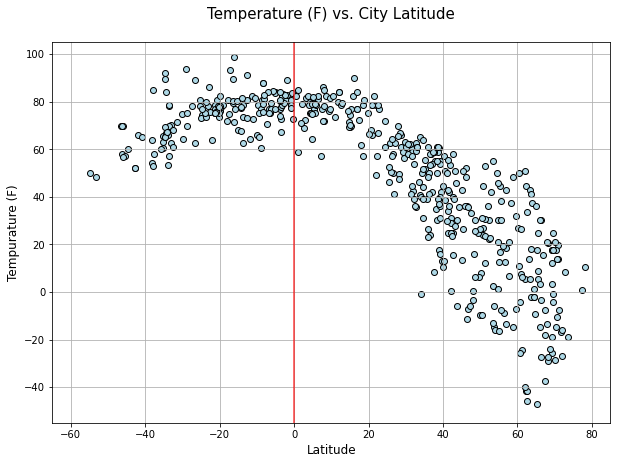

In [149]:
plt.figure(figsize=(10,7))
x_values = clean_city_df['Latitude']
y_values = clean_city_df['Max Temp']
plt.scatter(x_values, y_values, color = 'lightblue', edgecolors = 'black')
plt.title('Temperature (F) vs. City Latitude\n', fontsize = 15)
plt.xlabel('Latitude', fontsize = 12)
plt.ylabel('Tempurature (F)', fontsize = 12)
plt.xlim(-65,85)
plt.ylim(-55,105)
plt.vlines(0,-55,160, alpha=0.75, color='red')
plt.grid()

plt.show

## Latitude vs. Humidity Plot

<function matplotlib.pyplot.show>

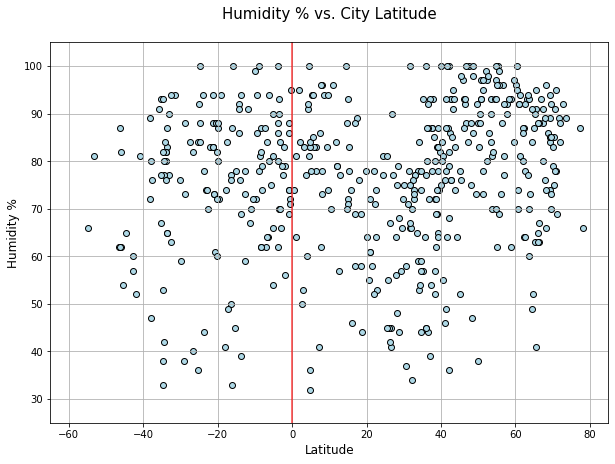

In [150]:
plt.figure(figsize=(10,7))
x_values = clean_city_df['Latitude']
y_values = clean_city_df['Humidity']
plt.scatter(x_values, y_values, color = 'lightblue', edgecolors = 'black')
plt.title('Humidity % vs. City Latitude\n', fontsize = 15)
plt.xlabel('Latitude', fontsize = 12)
plt.ylabel('Humidity %', fontsize = 12)
plt.xlim(-65,85)
plt.ylim(25,105)
plt.vlines(0,25,105, alpha=0.75, color='red')
plt.grid()

plt.show

## Latitude vs. Cloudiness Plot

<function matplotlib.pyplot.show>

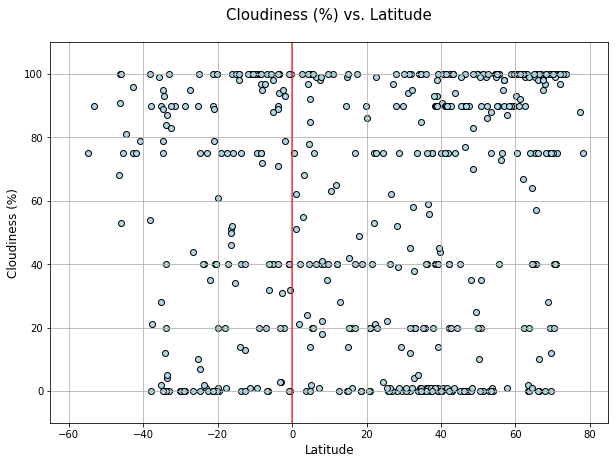

In [159]:
plt.figure(figsize=(10,7))
x_values = clean_city_df['Latitude']
y_values = clean_city_df['Cloudiness']
plt.scatter(x_values, y_values, color = 'lightblue', edgecolors = 'black')
plt.title('Cloudiness (%) vs. Latitude\n', fontsize = 15)
plt.xlabel('Latitude', fontsize = 12)
plt.ylabel('Cloudiness (%)', fontsize = 12)
plt.xlim(-65,85)
plt.ylim(-10,110)
plt.vlines(0,-10,110, alpha=0.75, color='red')
plt.grid()

plt.show

## Latitude vs. Wind Speed Plot

<function matplotlib.pyplot.show>

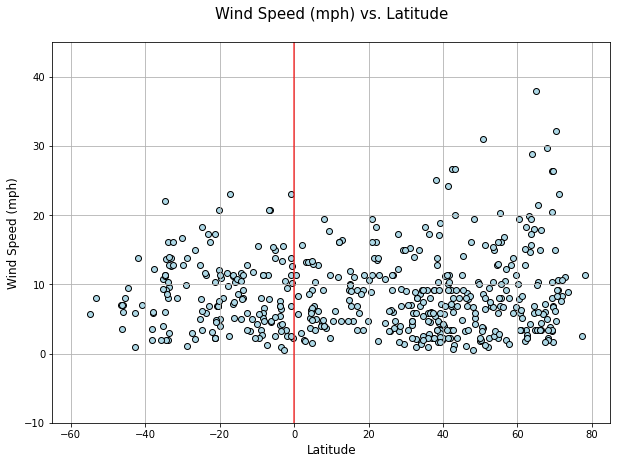

In [161]:
plt.figure(figsize=(10,7))
x_values = clean_city_df['Latitude']
y_values = clean_city_df['Wind']
plt.scatter(x_values, y_values, color = 'lightblue', edgecolors = 'black')
plt.title('Wind Speed (mph) vs. Latitude\n', fontsize = 15)
plt.xlabel('Latitude', fontsize = 12)
plt.ylabel('Wind Speed (mph)', fontsize = 12)
plt.xlim(-65,85)
plt.ylim(-10,45)
plt.vlines(0,-10,45, alpha=0.75, color='red')
plt.grid()

plt.show

## Linear Regression

In [162]:
# Seperating the hemispheres into north and south
north_hemi_weather_df = clean_city_df.loc[clean_city_df["Latitude"] >= 0]
south_hemi_weather_df = clean_city_df.loc[clean_city_df["Latitude"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6961735119289059


<function matplotlib.pyplot.show>

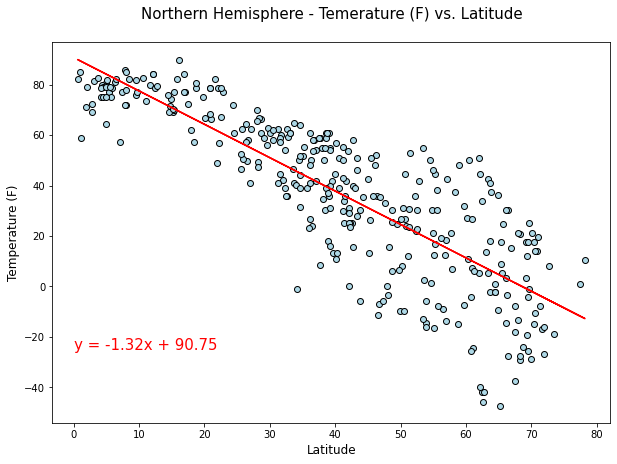

In [172]:
#Adding the linear regression equation and line to the scatter plot.
x_values = north_hemi_weather_df['Latitude']
y_values = north_hemi_weather_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

fig1, ax1 = plt.subplots(figsize=(10,7))
plt.scatter(x_values, y_values, color = 'lightblue', edgecolors = 'black')

plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(0,-25),fontsize=15,color="red")

plt.title('Northern Hemisphere - Temperature (F) vs. Latitude\n', fontsize = 15)
plt.xlabel('Latitude', fontsize = 12)
plt.ylabel('Temperature (F)', fontsize = 12)

print(f"The r-squared is: {rvalue**2}")
plt.show

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.34562640816920004


<function matplotlib.pyplot.show>

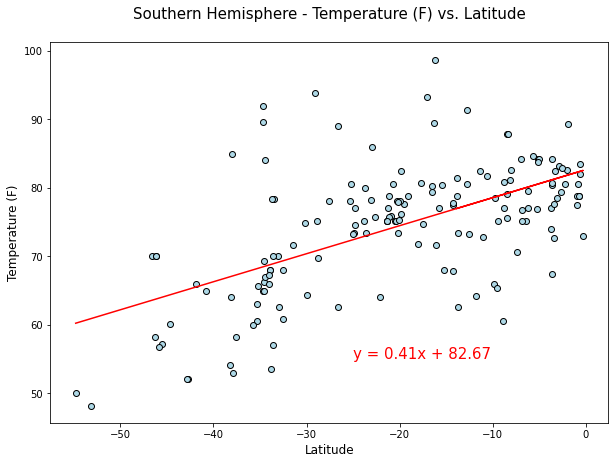

In [181]:
#Adding the linear regression equation and line to the scatter plot.
x_values = south_hemi_weather_df['Latitude']
y_values = south_hemi_weather_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

fig1, ax1 = plt.subplots(figsize=(10,7))
plt.scatter(x_values, y_values, color = 'lightblue', edgecolors = 'black')

plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-25,55),fontsize=15,color="red")

plt.title('Southern Hemisphere - Temperature (F) vs. Latitude\n', fontsize = 15)
plt.xlabel('Latitude', fontsize = 12)
plt.ylabel('Temperature (F)', fontsize = 12)

print(f"The r-squared is: {rvalue**2}")
plt.show

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.06025444477610909


<function matplotlib.pyplot.show>

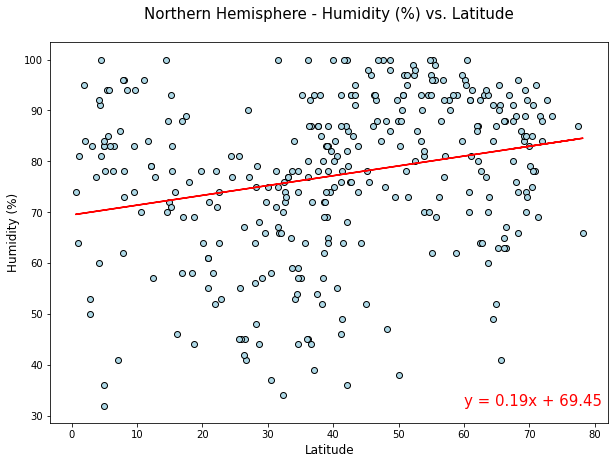

In [177]:
#Adding the linear regression equation and line to the scatter plot.
x_values = north_hemi_weather_df['Latitude']
y_values = north_hemi_weather_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

fig1, ax1 = plt.subplots(figsize=(10,7))
plt.scatter(x_values, y_values, color = 'lightblue', edgecolors = 'black')

plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(60,32),fontsize=15,color="red")

plt.title('Northern Hemisphere - Humidity (%) vs. Latitude\n', fontsize = 15)
plt.xlabel('Latitude', fontsize = 12)
plt.ylabel('Humidity (%)', fontsize = 12)

print(f"The r-squared is: {rvalue**2}")
plt.show

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.02661719382035368


<function matplotlib.pyplot.show>

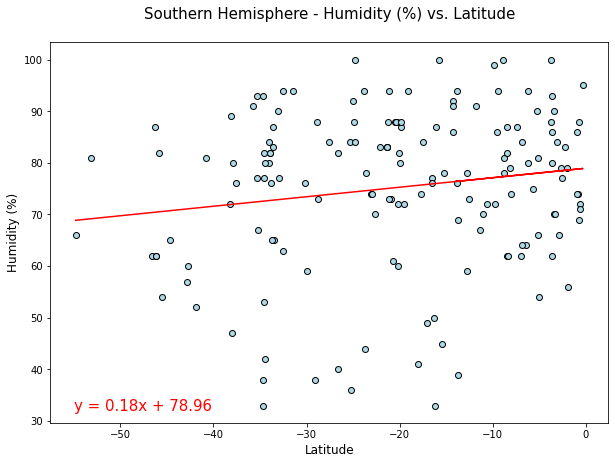

In [180]:
#Adding the linear regression equation and line to the scatter plot.
x_values = south_hemi_weather_df['Latitude']
y_values = south_hemi_weather_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

fig1, ax1 = plt.subplots(figsize=(10,7))
plt.scatter(x_values, y_values, color = 'lightblue', edgecolors = 'black')

plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-55,32),fontsize=15,color="red")

plt.title('Southern Hemisphere - Humidity (%) vs. Latitude\n', fontsize = 15)
plt.xlabel('Latitude', fontsize = 12)
plt.ylabel('Humidity (%)', fontsize = 12)

print(f"The r-squared is: {rvalue**2}")
plt.show

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.055905717631240096


<function matplotlib.pyplot.show>

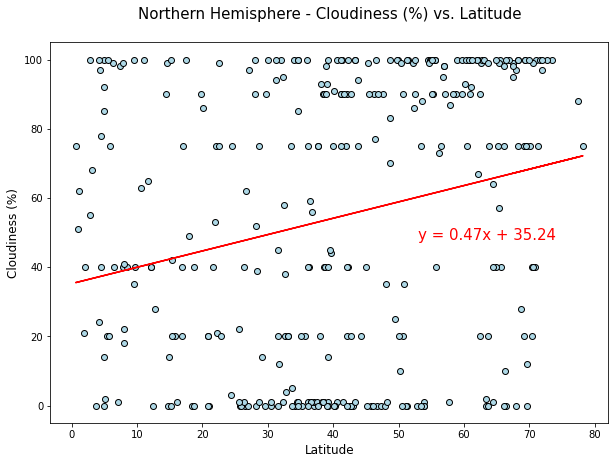

In [186]:
#Adding the linear regression equation and line to the scatter plot.
x_values = north_hemi_weather_df['Latitude']
y_values = north_hemi_weather_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

fig1, ax1 = plt.subplots(figsize=(10,7))
plt.scatter(x_values, y_values, color = 'lightblue', edgecolors = 'black')

plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(53,48),fontsize=15,color="red")

plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude\n', fontsize = 15)
plt.xlabel('Latitude', fontsize = 12)
plt.ylabel('Cloudiness (%)', fontsize = 12)

print(f"The r-squared is: {rvalue**2}")
plt.show

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 7.357642394820097e-05


<function matplotlib.pyplot.show>

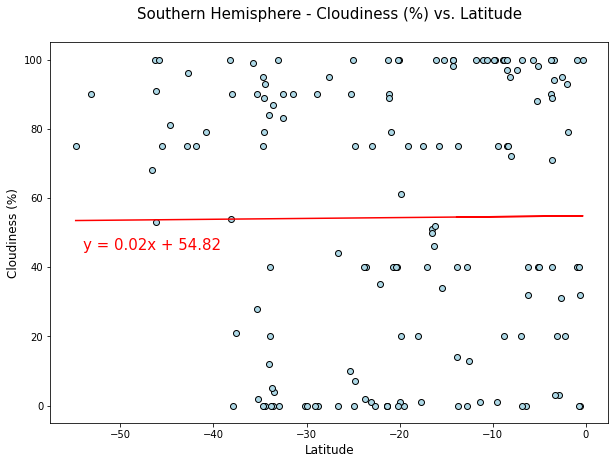

In [190]:
#Adding the linear regression equation and line to the scatter plot.
x_values = south_hemi_weather_df['Latitude']
y_values = south_hemi_weather_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

fig1, ax1 = plt.subplots(figsize=(10,7))
plt.scatter(x_values, y_values, color = 'lightblue', edgecolors = 'black')

plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-54,45),fontsize=15,color="red")

plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude\n', fontsize = 15)
plt.xlabel('Latitude', fontsize = 12)
plt.ylabel('Cloudiness (%)', fontsize = 12)

print(f"The r-squared is: {rvalue**2}")
plt.show

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.01135096973322235


<function matplotlib.pyplot.show>

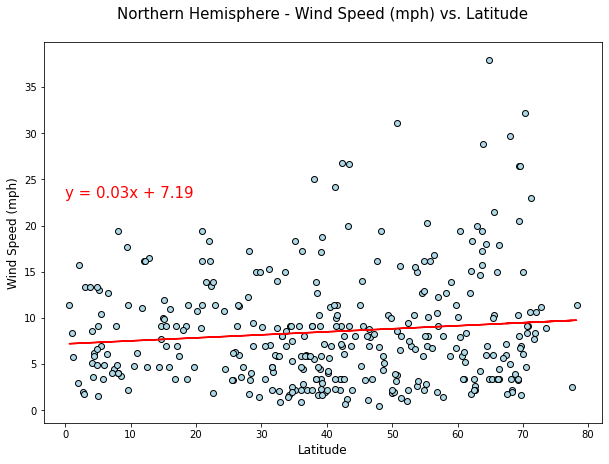

In [192]:
#Adding the linear regression equation and line to the scatter plot.
x_values = north_hemi_weather_df['Latitude']
y_values = north_hemi_weather_df['Wind']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

fig1, ax1 = plt.subplots(figsize=(10,7))
plt.scatter(x_values, y_values, color = 'lightblue', edgecolors = 'black')

plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(0,23),fontsize=15,color="red")

plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude\n', fontsize = 15)
plt.xlabel('Latitude', fontsize = 12)
plt.ylabel('Wind Speed (mph)', fontsize = 12)

print(f"The r-squared is: {rvalue**2}")
plt.show

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0002475772392400318


<function matplotlib.pyplot.show>

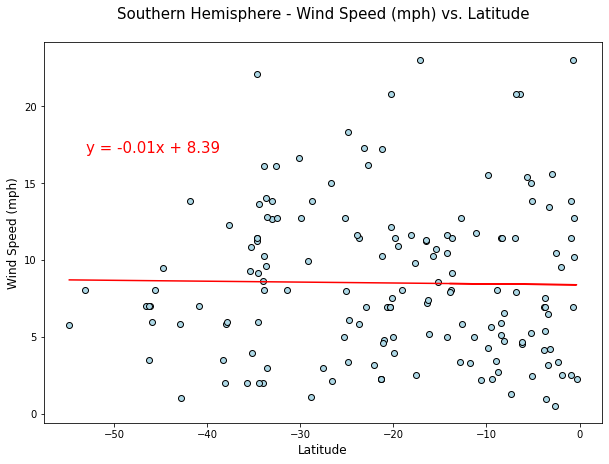

In [194]:
#Adding the linear regression equation and line to the scatter plot.
x_values = south_hemi_weather_df['Latitude']
y_values = south_hemi_weather_df['Wind']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

fig1, ax1 = plt.subplots(figsize=(10,7))
plt.scatter(x_values, y_values, color = 'lightblue', edgecolors = 'black')

plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-53,17),fontsize=15,color="red")

plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude\n', fontsize = 15)
plt.xlabel('Latitude', fontsize = 12)
plt.ylabel('Wind Speed (mph)', fontsize = 12)

print(f"The r-squared is: {rvalue**2}")
plt.show